In [1]:
import pandas as pd
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/children_products/!03&04_17_VSE.csv', encoding='cp1251', sep=';')

In [3]:
df.shape

(691539, 38)

In [317]:
stats = pd.DataFrame({
    'Название колонки': df.columns,
    'Количество уникальных': df.nunique(),
    'Количество нулей': (df == 0).sum(),
    'Количество NaN': df.isna().sum(),
    '% NaN': round(df.isna().sum() / len(df) * 100, 1),
    'Тип данных': df.dtypes
}).reset_index(drop=True)

print(tabulate(stats, headers='keys', tablefmt='orgtbl', showindex=False))

| Название колонки         |   Количество уникальных |   Количество нулей |   Количество NaN |   % NaN | Тип данных   |
|--------------------------+-------------------------+--------------------+------------------+---------+--------------|
| Дата                     |                   28887 |                  0 |                0 |     0   | object       |
| ДатаДоставки             |                     107 |                  0 |              626 |     0.1 | object       |
| НомерЗаказаНаСайте       |                  178418 |                  0 |                4 |     0   | object       |
| НовыйСтатус              |                      14 |                  0 |                0 |     0   | object       |
| СуммаЗаказаНаСайте       |                   14316 |                  0 |                0 |     0   | object       |
| СуммаДокумента           |                   14747 |                  0 |                0 |     0   | object       |
| МетодДоставки            |            

In [4]:
for column in df.columns:
    unique_values = df[column].unique()
    print(f"\nКолонка '{column}' ({len(unique_values)} уникальных значений):")
    if len(unique_values) <= 10:
        print(unique_values)
    else:
        print(list(unique_values[:10]), "... и еще", len(unique_values) - 10, "значений")


Колонка 'Дата' (28887 уникальных значений):
['01.03.2017 11:41', '01.03.2017 12:22', '01.03.2017 12:31', '01.03.2017 3:06', '01.03.2017 11:38', '01.03.2017 12:19', '01.03.2017 11:57', '01.03.2017 9:02', '01.03.2017 12:00', '01.03.2017 10:39'] ... и еще 28877 значений

Колонка 'ДатаДоставки' (108 уникальных значений):
['07.03.2017 0:00', '15.03.2017 0:00', '17.03.2017 0:00', '02.03.2017 0:00', '14.03.2017 0:00', '09.03.2017 0:00', '03.03.2017 0:00', '04.03.2017 0:00', '16.03.2017 0:00', '10.03.2017 0:00'] ... и еще 98 значений

Колонка 'НомерЗаказаНаСайте' (178419 уникальных значений):
['3998972_TR', '3999117_TR', '3999122_TR', '3999363_TR', '3999411_TR', '3999682_TR', '3999687_TR', '3999713_TR', '3999735_TR', '4000052_TR'] ... и еще 178409 значений

Колонка 'НовыйСтатус' (14 уникальных значений):
['Частичный возврат', 'Доставлен', 'К отгрузке', 'Возврат', 'Возврат из ПВЗ', 'Принят в ПВЗ', 'Расформирован ПВЗ', 'В резерве', 'Отменен', 'Скомплектован Регион'] ... и еще 4 значений

Колонк

In [5]:
df_clean = df.copy()

Удаляем ненужные данные:
1) ДатаДоставки - дублирует дату
2) НовыйСтатус - достаточно колонки Статус
3) СуммаЗаказаНаСайте - можно посчитать, как стоимость строки товара (количество * цену) сложенные по НомеруЗаказаНаСайте
4) СуммаДокумента - также можно вычислить с других строк
5) ФормаОплаты
6) Регион - слишком много уникальных значений, лучше использовать обобщенный Гео
7) Группа4 - слишком широкая группа, достаточно Группы2 и Группы3
8) Номенклантура - ID_SKU более лучший вариант для подсчета уникальных товаров, так как нет пересечения в названии
9) ТипТовара - подбножество колонки Тип
10) ПричинаОтмены - тяжело для группировки
11) СуммаСтроки - вычисляется из других колонок
12) ЦенаЗакупки - в целом плохо интерпритируем, маржа интересней
13) МесяцДатыЗаказа - можно взять из Даты
14) ГодДатыЗаказа - можно взять из Даты
15) ПВЗ_код - ничего не дает
16) СуммаДоставки - почти тоже самое, что и СуммаУслуг
17) НомерСтроки
18) КоличествоПроданоКлиенту - дублирует количество
19) ДатаЗаказаНаСайте
20) ЭлектроннаяПочта_new - менее надежная чем телефон
21) Клиент - не уникальный идентификатор, лучше телефон
22) ГородМагаза - не нужно
23) МагазинЗаказа - не нужно

In [6]:
df_clean = df_clean.drop(
    [
        'ДатаДоставки',
        'НовыйСтатус',
        'СуммаЗаказаНаСайте',
        'СуммаДокумента',
        'ФормаОплаты',
        'Регион',
        'Группа4',
        'Номенклатура',
        'ТипТовара',
        'ПричинаОтмены',
        'СуммаСтроки',
        'ЦенаЗакупки',
        'МесяцДатыЗаказа',
        'ГодДатыЗаказа',
        'ПВЗ_код',
        'СуммаДоставки',
        'НомерСтроки',
        'КоличествоПроданоКлиенту',
        'ДатаЗаказаНаСайте',
        'ЭлектроннаяПочта_new',
        'Клиент',
        'ГородМагазина',
        'МагазинЗаказа'
     ],
    axis=1)

In [7]:
stats = pd.DataFrame({
    'Название колонки': df_clean.columns,
    'Количество уникальных': df_clean.nunique(),
    'Количество нулей': (df_clean == 0).sum(),
    'Количество NaN': df_clean.isna().sum(),
    '% NaN': round(df_clean.isna().sum() / len(df_clean) * 100, 1),
    'Тип данных': df_clean.dtypes
}).reset_index(drop=True)

print(tabulate(stats, headers='keys', tablefmt='orgtbl', showindex=False))

| Название колонки   |   Количество уникальных |   Количество нулей |   Количество NaN |   % NaN | Тип данных   |
|--------------------+-------------------------+--------------------+------------------+---------+--------------|
| Дата               |                   28887 |                  0 |                0 |     0   | object       |
| НомерЗаказаНаСайте |                  178418 |                  0 |                4 |     0   | object       |
| МетодДоставки      |                       7 |                  0 |                0 |     0   | object       |
| Группа2            |                      13 |                  0 |            74686 |    10.8 | object       |
| Группа3            |                      93 |                  0 |            74686 |    10.8 | object       |
| Тип                |                       5 |                  0 |                0 |     0   | object       |
| Отменено           |                       2 |                  0 |                0 |

In [8]:
for column in df_clean.columns:
    unique_values = df_clean[column].unique()
    print(f"\nКолонка '{column}' ({len(unique_values)} уникальных значений):")
    if len(unique_values) <= 10:
        print(unique_values)
    else:
        print(list(unique_values[:10]), "... и еще", len(unique_values) - 10, "значений")


Колонка 'Дата' (28887 уникальных значений):
['01.03.2017 11:41', '01.03.2017 12:22', '01.03.2017 12:31', '01.03.2017 3:06', '01.03.2017 11:38', '01.03.2017 12:19', '01.03.2017 11:57', '01.03.2017 9:02', '01.03.2017 12:00', '01.03.2017 10:39'] ... и еще 28877 значений

Колонка 'НомерЗаказаНаСайте' (178419 уникальных значений):
['3998972_TR', '3999117_TR', '3999122_TR', '3999363_TR', '3999411_TR', '3999682_TR', '3999687_TR', '3999713_TR', '3999735_TR', '4000052_TR'] ... и еще 178409 значений

Колонка 'МетодДоставки' (7 уникальных значений):
['Курьерская' 'Магазины' 'Pick point' 'DPD' 'Транспортная компания'
 'Самовывоз' 'Почта России']

Колонка 'Группа2' (14 уникальных значений):
['КРУПНОГАБАРИТНЫЙ ТОВАР', 'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ИГРУШКИ', 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'ОБУВЬ', 'СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ПОДГУЗНИКИ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'КОСМЕТИКА/ГИГИЕНА', 'ЖЕНСКИЕ ШТУЧКИ'] ... и еще 4 значений

Колонка 'Группа3' (94 уникальных значений):
['КОЛЯСКИ', 'ОДЕЖДА ДЛЯ НОВОРОЖДЕННЫХ (0-2 лет)'

Приводим тип даты

In [9]:
df_clean['Дата'] = pd.to_datetime(df_clean['Дата'], format='%d.%m.%Y %H:%M')

Группируем логически в меньшии группы способ доставки

In [10]:
# ['Курьерская' 'Магазины' 'Pick point' 'DPD' 'Транспортная компания' 'Самовывоз' 'Почта России']
def group_delivery_method(method):
    if 'Курьерская' in str(method):
        return 'Курьерская'
    elif 'Магазины' in str(method) or 'Самовывоз' in str(method):
        return 'Магазины'
    else :
        return 'Пункт выдачи'

df_clean['МетодДоставки_Групп'] = df_clean['МетодДоставки'].apply(group_delivery_method)

Исправляем тип для ценовых значений

In [11]:
df_clean['Цена'] = df_clean['Цена'].astype(str).str.replace(' ', '').str.replace(',', '.')
df_clean['Цена'] = pd.to_numeric(df_clean['Цена'], errors='coerce')

In [12]:
df_clean['Маржа'] = df_clean['Маржа'].astype(str).str.replace(' ', '').str.replace(',', '.')
df_clean['Маржа'] = pd.to_numeric(df_clean['Маржа'], errors='coerce')

In [13]:
df_clean['СуммаУслуг'] = df_clean['СуммаУслуг'].astype(str).str.replace(' ', '').str.replace(',', '.')
df_clean['СуммаУслуг'] = pd.to_numeric(df_clean['СуммаУслуг'], errors='coerce')

In [14]:
df_clean.head

<bound method NDFrame.head of                       Дата НомерЗаказаНаСайте МетодДоставки  \
0      2017-03-01 11:41:00         3998972_TR    Курьерская   
1      2017-03-01 12:22:00         3999117_TR      Магазины   
2      2017-03-01 12:31:00         3999122_TR      Магазины   
3      2017-03-01 03:06:00         3999363_TR    Курьерская   
4      2017-03-01 11:38:00         3999411_TR      Магазины   
...                    ...                ...           ...   
691534 2017-04-17 09:54:00         4411156_TR      Магазины   
691535 2017-04-17 10:10:00         4411268_TR      Магазины   
691536 2017-04-17 11:03:00         4411571_TR      Магазины   
691537 2017-04-17 11:03:00         4411571_TR      Магазины   
691538 2017-04-17 10:41:00         4411576_TR      Магазины   

                       Группа2                              Группа3      Тип  \
0       КРУПНОГАБАРИТНЫЙ ТОВАР                              КОЛЯСКИ      КГТ   
1           ТЕКСТИЛЬ, ТРИКОТАЖ   ОДЕЖДА ДЛЯ НОВОРОЖДЕ

Удаляем Nan и заполняем пару пустых значений в Марже

In [15]:
df_clean.dropna(subset=['Группа2', 'Группа3', 'НомерЗаказаНаСайте'], inplace=True)

df_clean['Маржа'].fillna(0, inplace=True)

/var/folders/2s/l9p15g5j1t3gkzyssvhh423r0000gn/T/ipykernel_95548/3265859453.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Маржа'].fillna(0, inplace=True)


In [293]:
df_clean.head

<bound method NDFrame.head of                       Дата НомерЗаказаНаСайте МетодДоставки  \
0      2017-03-01 11:41:00         3998972_TR    Курьерская   
1      2017-03-01 12:22:00         3999117_TR      Магазины   
2      2017-03-01 12:31:00         3999122_TR      Магазины   
3      2017-03-01 03:06:00         3999363_TR    Курьерская   
4      2017-03-01 11:38:00         3999411_TR      Магазины   
...                    ...                ...           ...   
691534 2017-04-17 09:54:00         4411156_TR      Магазины   
691535 2017-04-17 10:10:00         4411268_TR      Магазины   
691536 2017-04-17 11:03:00         4411571_TR      Магазины   
691537 2017-04-17 11:03:00         4411571_TR      Магазины   
691538 2017-04-17 10:41:00         4411576_TR      Магазины   

                       Группа2                              Группа3      Тип  \
0       КРУПНОГАБАРИТНЫЙ ТОВАР                              КОЛЯСКИ      КГТ   
1           ТЕКСТИЛЬ, ТРИКОТАЖ   ОДЕЖДА ДЛЯ НОВОРОЖДЕ

In [16]:
stats = pd.DataFrame({
    'Название колонки': df_clean.columns,
    'Количество уникальных': df_clean.nunique(),
    'Количество нулей': (df_clean == 0).sum(),
    'Количество NaN': df_clean.isna().sum(),
    '% NaN': round(df_clean.isna().sum() / len(df_clean) * 100, 1),
    'Тип данных': df_clean.dtypes
}).reset_index(drop=True)

print(tabulate(stats, headers='keys', tablefmt='orgtbl', showindex=False))

| Название колонки    |   Количество уникальных |   Количество нулей |   Количество NaN |   % NaN | Тип данных     |
|---------------------+-------------------------+--------------------+------------------+---------+----------------|
| Дата                |                   28886 |                  0 |                0 |       0 | datetime64[ns] |
| НомерЗаказаНаСайте  |                  178418 |                  0 |                0 |       0 | object         |
| МетодДоставки       |                       7 |                  0 |                0 |       0 | object         |
| Группа2             |                      13 |                  0 |                0 |       0 | object         |
| Группа3             |                      93 |                  0 |                0 |       0 | object         |
| Тип                 |                       5 |                  0 |                0 |       0 | object         |
| Отменено            |                       2 |               

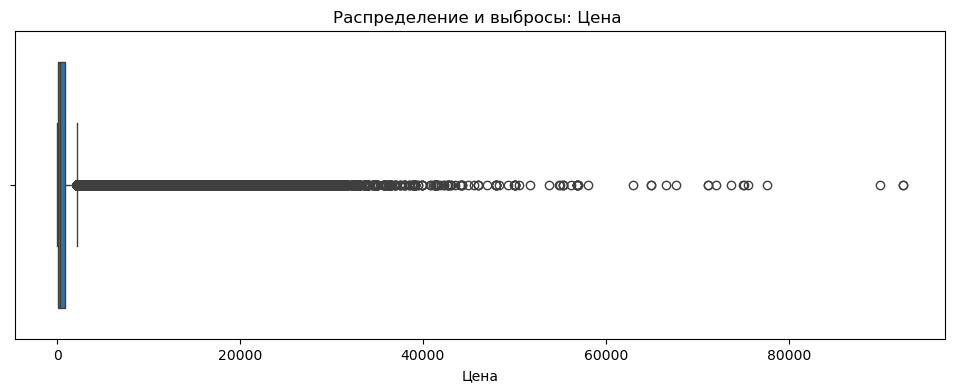

In [17]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_clean['Цена'])
plt.title(f'Распределение и выбросы: Цена ')
plt.xlabel('Цена')
plt.show()

In [18]:
df_clean = df_clean[(df_clean['Цена'] <= 80000)]

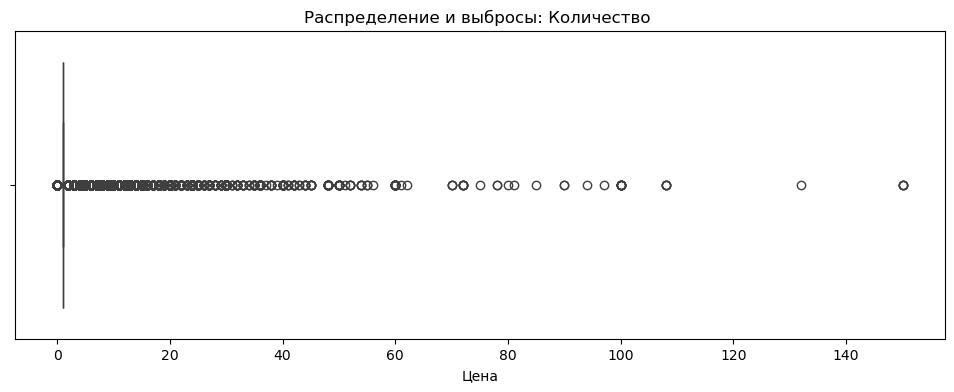

In [19]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_clean['Количество'])
plt.title(f'Распределение и выбросы: Количество ')
plt.xlabel('Цена')
plt.show()

In [20]:
df_clean = df_clean[(df_clean['Количество'] <= 80000)]

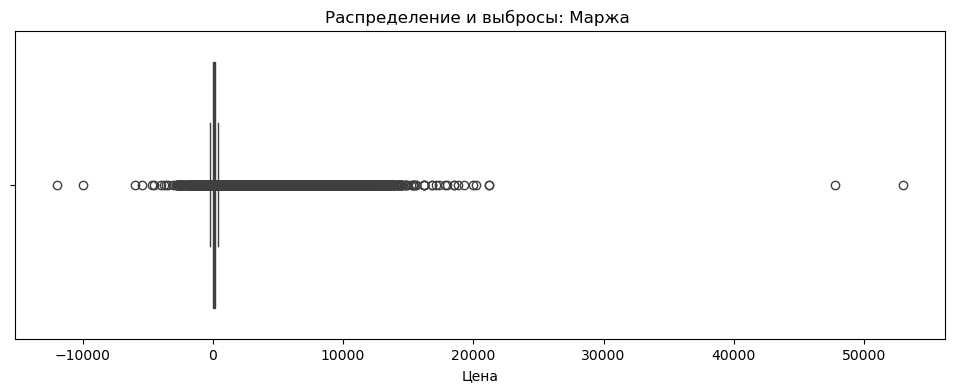

In [21]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_clean['Маржа'])
plt.title(f'Распределение и выбросы: Маржа ')
plt.xlabel('Цена')
plt.show()

In [22]:
df_clean = df_clean[(df_clean['Маржа'] <= 40000)]

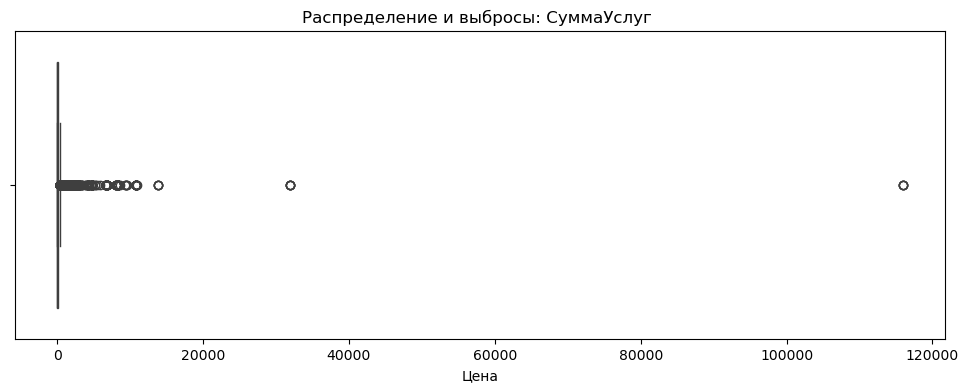

In [23]:
plt.figure(figsize=(12, 4))
sns.boxplot(x=df_clean['СуммаУслуг'])
plt.title(f'Распределение и выбросы: СуммаУслуг ')
plt.xlabel('Цена')
plt.show()

In [24]:
df_clean = df_clean[(df_clean['СуммаУслуг'] <= 20000)]

In [25]:
top_10 = df_clean['Телефон_new'].value_counts().head(10)
print(top_10)

Телефон_new
0                          5922
55574956-49554853504971     356
55575053-56495253555476     352
55574950-52565448524974     326
55574954-50565757495175     264
55575455-48575054505274     245
55574853-55555451555673     244
55575653-52494949535478     235
55574854-51575157575172     222
55574851-48485550565171     212
Name: count, dtype: int64


In [26]:
df_clean = df_clean[df_clean['Телефон_new'] != '0']

In [27]:
top_10 = df_clean['Телефон_new'].value_counts().head(10)
print(top_10)

Телефон_new
55574956-49554853504971    356
55575053-56495253555476    352
55574950-52565448524974    326
55574954-50565757495175    264
55575455-48575054505274    245
55574853-55555451555673    244
55575653-52494949535478    235
55574854-51575157575172    222
55574851-48485550565171    212
55575452-54505448505673    209
Name: count, dtype: int64


In [28]:
df_clean.to_csv('../data/children_products/clildren_product_cleaned.csv', index=False, encoding='utf-8-sig')

In [29]:
df_new = pd.read_csv('../data/children_products/clildren_product_cleaned.csv', encoding='utf-8-sig')

print(f"Размер датасета: {df.shape}")
print("\nПервые 5 строк:")
print(df.head())
print("\nТипы данных:")
print(df.dtypes)

Размер датасета: (691539, 38)

Первые 5 строк:
               Дата     ДатаДоставки НомерЗаказаНаСайте        НовыйСтатус  \
0  01.03.2017 11:41  07.03.2017 0:00         3998972_TR  Частичный возврат   
1  01.03.2017 12:22  15.03.2017 0:00         3999117_TR          Доставлен   
2  01.03.2017 12:31  17.03.2017 0:00         3999122_TR          Доставлен   
3   01.03.2017 3:06  02.03.2017 0:00         3999363_TR         К отгрузке   
4  01.03.2017 11:38  14.03.2017 0:00         3999411_TR          Доставлен   

  СуммаЗаказаНаСайте СуммаДокумента МетодДоставки  ФормаОплаты         Регион  \
0             12 098         12 247    Курьерская     Наличная         Москва   
1              4 819          3 759      Магазины  Безналичная      Челябинск   
2              3 325          3 325      Магазины  Безналичная  Нижневартовск   
3              4 998          4 998    Курьерская     Наличная         Москва   
4                528            528      Магазины  Безналичная         Ижевск  

In [30]:
stats = pd.DataFrame({
    'Название колонки': df_new.columns,
    'Количество уникальных': df_new.nunique(),
    'Количество нулей': (df_new == 0).sum(),
    'Количество NaN': df_new.isna().sum(),
    '% NaN': round(df_new.isna().sum() / len(df_new) * 100, 1),
    'Тип данных': df_new.dtypes
}).reset_index(drop=True)

print(tabulate(stats, headers='keys', tablefmt='orgtbl', showindex=False))

| Название колонки    |   Количество уникальных |   Количество нулей |   Количество NaN |   % NaN | Тип данных   |
|---------------------+-------------------------+--------------------+------------------+---------+--------------|
| Дата                |                   28742 |                  0 |                0 |       0 | object       |
| НомерЗаказаНаСайте  |                  176144 |                  0 |                0 |       0 | object       |
| МетодДоставки       |                       7 |                  0 |                0 |       0 | object       |
| Группа2             |                      13 |                  0 |                0 |       0 | object       |
| Группа3             |                      93 |                  0 |                0 |       0 | object       |
| Тип                 |                       5 |                  0 |                0 |       0 | object       |
| Отменено            |                       2 |                  0 |          

In [31]:
for column in df_new.columns:
    unique_values = df_new[column].unique()
    print(f"\nКолонка '{column}' ({len(unique_values)} уникальных значений):")
    if len(unique_values) <= 10:
        print(unique_values)
    else:
        print(list(unique_values[:10]), "... и еще", len(unique_values) - 10, "значений")


Колонка 'Дата' (28742 уникальных значений):
['2017-03-01 11:41:00', '2017-03-01 12:22:00', '2017-03-01 12:31:00', '2017-03-01 03:06:00', '2017-03-01 11:38:00', '2017-03-01 12:19:00', '2017-03-01 11:57:00', '2017-03-01 09:02:00', '2017-03-01 12:00:00', '2017-03-01 10:39:00'] ... и еще 28732 значений

Колонка 'НомерЗаказаНаСайте' (176144 уникальных значений):
['3998972_TR', '3999117_TR', '3999122_TR', '3999363_TR', '3999411_TR', '3999682_TR', '3999687_TR', '3999713_TR', '3999735_TR', '4000052_TR'] ... и еще 176134 значений

Колонка 'МетодДоставки' (7 уникальных значений):
['Курьерская' 'Магазины' 'Pick point' 'DPD' 'Транспортная компания'
 'Самовывоз' 'Почта России']

Колонка 'Группа2' (13 уникальных значений):
['КРУПНОГАБАРИТНЫЙ ТОВАР', 'ТЕКСТИЛЬ, ТРИКОТАЖ', 'ИГРУШКИ', 'КАНЦТОВАРЫ, КНИГИ, ДИСКИ', 'ОБУВЬ', 'СОПУТСТВУЮЩИЕ ТОВАРЫ', 'ПОДГУЗНИКИ', 'ТОВАРЫ ДЛЯ КОРМЛЕНИЯ', 'КОСМЕТИКА/ГИГИЕНА', 'ЖЕНСКИЕ ШТУЧКИ'] ... и еще 3 значений

Колонка 'Группа3' (93 уникальных значений):
['КОЛЯСКИ', 'ОДЕ

In [ ]:
# ???
print(df_clean[df_clean['Отменено'] == 'Да']['Статус'].value_counts())

Статус
Отменен         48526
Доставлен       13245
Возврат          2702
В процессе        934
Не определен       20
Name: count, dtype: int64


In [ ]:
# ???
print(df_clean[df_clean['Отменено'] == 'Нет']['Статус'].value_counts())

Статус
Доставлен       420857
Возврат         107580
Отменен          10276
В процессе        5911
Не определен       862
Name: count, dtype: int64


In [39]:
print(df_clean[(df_clean['Отменено'] == 'Нет') & (df_clean['Статус'] == 'Доставлен')].size)

6733712


In [40]:
print(df_clean[(df_clean['Отменено'] == 'Да') | (df_clean['Статус'] == 'Отменен')].size)

1211248


- СуммаСтроки - Цена * Количество
- МаржаСтроки - Маржа * Количество
- phone - уникальный идентификатор 

df_success - все успешные заказы Отменено == Нет & Статус == Доставлен

На основе датасета об успешных заказах формируем группировку по телефон + Заказ. А потом уже применяем аггрегацию по телефону. Получаем следующие колонки:
- `ОбщаяСуммаЗаказов` - общая сумма заказов
- `СредняяСуммаЗаказов` - средння сумма успешных заказов
- `ОбщаяМаржаЗаказов` - общая маржа успешных заказов
- `СредняяМаржаЗаказов` - средняя маржа успешных заказов
- `КоличествоТоварныхПозиций` - среднее количество товарных позиций в заказе

- `КоличествоЗаказов` - количество заказов (количество уникальных номеров заказа для каждого пользователя)
- `ДоляОтменненыхЗаказов` - доля заказов у которых 'Отменено' == 'Да '
- `ДоляДоставленныхЗаказов` - доля заказов у которых 'Статус' == 'Доставлен'


- `ОбщееКоличествоТоваров` - общее количество товаров в успешных заказах  
- `КоличествоУникальныхТоваров` - количество уникальных товаров в успешных заказах
- `ОбщаяСуммаУслуг` - общая сумма услуг в успешных заказах
- `СредняяСуммаУслуг` - средняя сумма услуг в успешных заказах
- `КоличествоУникальныхТоваровГруппы3` - количество уникальных товаров в группе 3 в успешных заказах
- `КоличествоУникальныхТоваровГруппы2` - количество уникальных товаров в группе 2 в успешных заказах

'Группа2', 'Группа3', 'Тип', 'МетодДоставки_Групп', 'Гео' - доли по каждой категории среди успешных заказов

In [ ]:
def create_customer_showcase(df):
    df['СуммаСтроки'] = df['Цена'] * df['Количество']
    df['МаржаСтроки'] = df['Маржа'] * df['Количество']

    showcase = pd.DataFrame({'phone': df['Телефон_new'].unique()})

    is_not_cancelled = df['Отменено'] == 'Нет'
    is_delivered = df['Статус'] == 'Доставлен'

    df_success = df[is_delivered & is_not_cancelled].copy()

    df_all = df.copy()
    

    orders_agg = df_success.groupby(['Телефон_new', 'НомерЗаказаНаСайте'], as_index=False).agg({
        'СуммаСтроки': 'sum',
        'МаржаСтроки': 'sum',
        'Количество': 'sum',
        'Цена': 'count'
    }).rename(columns={
        'СуммаСтроки': 'OrderSum',
        'МаржаСтроки': 'OrderMargin',
        'Количество': 'OrderQty',
        'Цена': 'OrderItemsCount'
    })

    metrics = orders_agg.groupby('Телефон_new').agg(
        ОбщаяСуммаЗаказов=('OrderSum', 'sum'),
        СредняяСуммаЗаказов=('OrderSum', 'mean'),
        ОбщаяМаржаЗаказов=('OrderMargin', 'sum'),
        СредняяМаржаЗаказов=('OrderMargin', 'mean'),
        КоличествоТоварныхПозиций=('OrderItemsCount', 'mean')
    ).reset_index().rename(columns={'Телефон_new': 'phone'})

    showcase = showcase.merge(metrics, on='phone', how='left')

    order_statuses = df_all.sort_values('НомерЗаказаНаСайте').drop_duplicates('НомерЗаказаНаСайте')

    agg_dict = {'НомерЗаказаНаСайте': 'nunique'}

    agg_dict['Отменено'] = lambda x: (x == 'Да').mean()

    agg_dict['Статус'] = lambda x: (x == 'Доставлен').mean()

    metrics = order_statuses.groupby('Телефон_new').agg(agg_dict).reset_index()

    rename_map = {
        'Телефон_new': 'phone',
        'НомерЗаказаНаСайте': 'КоличествоЗаказов'
    }
    rename_map['Отменено'] = 'ДоляОтменненыхЗаказов'
    
    rename_map['Статус'] = 'ДоляДоставленныхЗаказов'

    metrics.rename(columns=rename_map, inplace=True)

    showcase = showcase.merge(metrics, on='phone', how='left')

    items_agg = {}
    items_agg['Количество'] = 'sum'
    items_agg['ID_SKU'] = 'nunique'

    i_metrics = df_success.groupby('Телефон_new').agg(items_agg).reset_index()
    i_metrics.rename(columns={
        'Телефон_new': 'phone',
        'Количество': 'ОбщееКоличествоТоваров', 
        'ID_SKU': 'КоличествоУникальныхТоваров'
    }, inplace=True)
    showcase = showcase.merge(i_metrics, on='phone', how='left')

    s_metrics = df_success.groupby('Телефон_new')['СуммаУслуг'].agg(['sum', 'mean']).reset_index()
    s_metrics.columns = ['phone', 'ОбщаяСуммаУслуг', 'СредняяСуммаУслуг']
    showcase = showcase.merge(s_metrics, on='phone', how='left')

    cat_agg = {}
    cat_agg['Группа2'] = 'nunique'
    cat_agg['Группа3'] = 'nunique'

    c_metrics = df_success.groupby('Телефон_new').agg(cat_agg).reset_index()
    rename_cat = {'Телефон_new': 'phone'}
    rename_cat['Группа2'] = 'КоличествоУникальныхТоваровГруппы2'
    rename_cat['Группа3'] = 'КоличествоУникальныхТоваровГруппы3'

    c_metrics.rename(columns=rename_cat, inplace=True)
    showcase = showcase.merge(c_metrics, on='phone', how='left')

    for col_name in ['Группа2', 'Группа3', 'Тип', 'МетодДоставки_Групп', 'Гео']:
        shares = (pd.crosstab(df_success['Телефон_new'], df_success[col_name], normalize='index')
                   .add_prefix(f'{col_name}_')
                   .reset_index()
                   .rename(columns={'Телефон_new': 'phone'}))
        showcase = showcase.merge(shares, on='phone', how='left')

    return showcase.fillna(0)

In [42]:
showcase = create_customer_showcase(df_new)
 
print(f"Клиентов: {len(showcase)}")
print(f"Признаков: {len(showcase.columns)}")
print(showcase.head())
print(showcase.describe())

Клиентов: 114444
Признаков: 131
                     phone  ОбщаяСуммаЗаказов  СредняяСуммаЗаказов  \
0  55574854-48574951555577                0.0                  0.0   
1  55575453-56535648535679             4875.0               2437.5   
2  55574950-57515657535772             3325.0               3325.0   
3  55574851-55545249535475             9650.0               4825.0   
4  55574854-56495552515179              528.0                528.0   

   ОбщаяМаржаЗаказов  СредняяМаржаЗаказов  КоличествоТоварныхПозиций  \
0               0.00                 0.00                        0.0   
1            1603.48               801.74                        6.0   
2            2176.00              2176.00                        1.0   
3            1277.46               638.73                       26.0   
4             204.07               204.07                        4.0   

   КоличествоЗаказов  ДоляОтменненыхЗаказов  ДоляДоставленныхЗаказов  \
0                  1                    0.

In [43]:
showcase.to_csv('../data/children_products/clildren_product_showcase.csv', index=False, encoding='utf-8-sig')

In [46]:
showcase.head(100).to_excel('../data/children_products/clildren_product_showcase_example.xlsx', index=False)


Дообработка. Проверка на корреляцию

In [ ]:
columns_to_keep = [
    'ОбщаяСуммаЗаказов',
    'СредняяСуммаЗаказов', 
    'ОбщаяМаржаЗаказов',
    'СредняяМаржаЗаказов',
    'КоличествоТоварныхПозиций',
    'КоличествоЗаказов',
    'ДоляОтменненыхЗаказов',
    'ДоляДоставленныхЗаказов',
    'ОбщееКоличествоТоваров',
    'КоличествоУникальныхТоваров',
    'ОбщаяСуммаУслуг',
    'СредняяСуммаУслуг',
    'КоличествоУникальныхТоваровГруппы3',
    'КоличествоУникальныхТоваровГруппы2'
]
df_selected = showcase[columns_to_keep]

correlation_matrix = df_selected.corr()

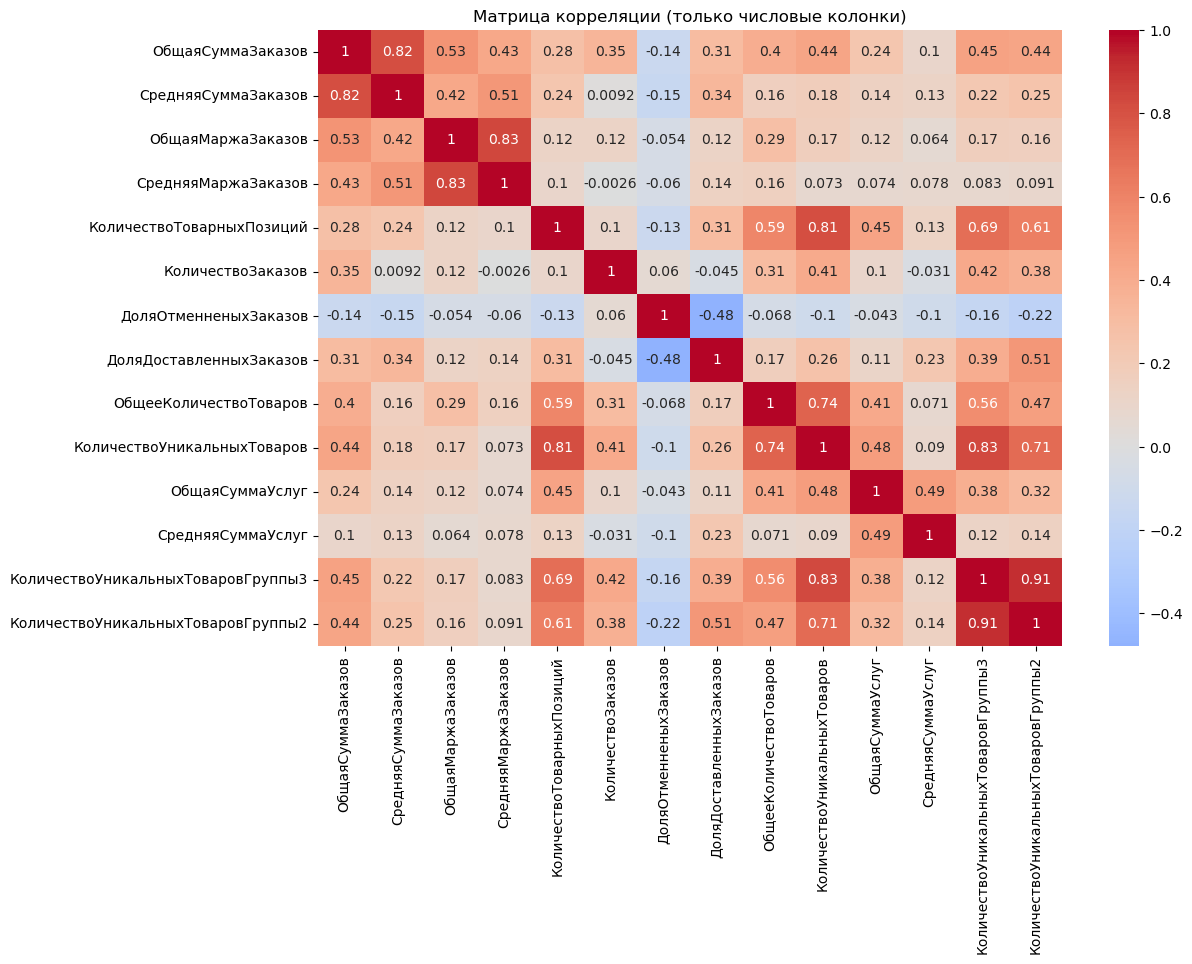

In [ ]:
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Матрица корреляции')
plt.show()

В датафрейме найдена сильная корреляция между Общей/Средней суммой заказов, Общей/Средней маржей заказов, количество уникальных товаров в группах 2 и 3, количество уникальный товаров в группах 3 и количество уникальных товаров.

In [52]:
showcase = showcase.drop(
    [
        'СредняяСуммаЗаказов',
        'СредняяМаржаЗаказов',
        'КоличествоУникальныхТоваровГруппы3',
        'КоличествоУникальныхТоваровГруппы2'
     ],
    axis=1)

In [53]:
showcase.to_csv('../data/children_products/clildren_product_showcase_remove_corr.csv', index=False, encoding='utf-8-sig')

In [54]:
showcase.head(100).to_excel('../data/children_products/clildren_product_showcase_example.xlsx', index=False)

In [56]:
showcase.shape

(114444, 127)

In [57]:
showcase[showcase['ОбщаяСуммаЗаказов'] == 0].shape

(27250, 127)

In [58]:
showcase = showcase[showcase['ОбщаяСуммаЗаказов'] != 0]

In [59]:
showcase.head(100).to_excel('../data/children_products/clildren_product_showcase_example.xlsx', index=False)

In [60]:
showcase.to_csv('../data/children_products/clildren_product_showcase_remove_corr.csv', index=False, encoding='utf-8-sig')